### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
 * Data
 * Variable DefinitioN
 * User_ID User ID
 * Product_ID Product ID
 * Gender Sex of User
 * Age Age in bins
 * Occupation Occupation (Masked)
 * City_Category Category of the City (A,B,C)
 * Stay_In_Current_City_Years Number of years stay in current city
 * Marital_Status Marital Status
 * Product_Category_1 Product Category (Masked)
 * Product_Category_2 Product may belongs to other category also (Masked)
 * Product_Category_3 Product may belongs to other category also (Masked)
 * Purchase Purchase Amount (Target Variable)"



 ### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading train dataset

In [2]:
data =  pd.read_csv("blackfriday_train.csv")

In [3]:
print(data.shape)
data.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Loading test dataset

In [4]:
data1=pd.read_csv("blackfriday_test.csv")

In [5]:
print(data1.shape)
data.head()

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Merging both train and test dataset.

In [6]:
df=data.append(data1, sort = False)

### visualizing fist 5 rows of the dataset.

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


 ### Describing the basic statistics of the data.

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


 ### Dropping unnecessary fields from the dataset.

In [11]:
df.drop(["User_ID"], axis=1,inplace= True)

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Converting categorical data into integer ones by using mapping function.


In [13]:
df["Gender"]=df["Gender"].map({"F":0 , "M":1})

In [14]:
df["Gender"].head(10) # checking the column after tranasformation

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

### visualizing the unique values of the particular field.

In [16]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### Mapping the range variable into integer ones.

In [17]:
df["Age"] = df["Age"].map({'0-17':1,'55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7})

In [18]:
df["Age"].head(20)

0     1
1     1
2     1
3     1
4     2
5     3
6     4
7     4
8     4
9     3
10    3
11    3
12    3
13    3
14    5
15    5
16    5
17    5
18    6
19    3
Name: Age, dtype: int64

### creating dummies for the categorical data.


In [22]:
city = pd.get_dummies(df["City_Category"],drop_first= True)

In [23]:
city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


 ### Concatinaing dummy variables with original dataset.

In [25]:
df =pd.concat([df,city],axis=1)

In [26]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0,0,1


### Dropping the Column.

In [45]:
df.drop('City_Category',axis=1, inplace=True) 

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,2,16,4+,0,8,8.0,16.0,7969.0,0,1


 ### Checking for columnwise null values or missing values

In [27]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### visualizing unique values of fields which contains NAN values for different columns.

In [28]:
df.Product_Category_1.unique()     

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [29]:
df.Product_Category_2.unique() 

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
df.Product_Category_3.unique() 

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count of each variable.

In [32]:
df.Product_Category_1.value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

### Finding mode of the field.

In [33]:
df. Product_Category_1.mode()

0    5
dtype: int64

### Renaming the columns.

In [34]:
df.rename(columns={"Product_Category_1":"cat1","Product_Category_2":"cat2","Product_Category_3":"cat3"}, inplace= True)

### Looking at the column names after the rename operation.

In [35]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

### filling the nan values with the mode.

In [36]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [37]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,2,16,C,4+,0,8,8.0,NaN,7969.0,0,1


In [38]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [39]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,2,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [40]:
df.cat3.mode()

0    16.0
dtype: float64

In [41]:
df.isnull().sum() 

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Filling the nan values with the mean of the column.

In [43]:
df["Purchase"]=df["Purchase"].fillna(df["Purchase"].mean())

In [44]:
df.isnull().sum() # all the null values have been removed

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Replacing the value by using str method.

In [47]:
df["Stay_In_Current_City_Years"] =df.Stay_In_Current_City_Years.str.replace("+"," ") # replacing + with blank

In [48]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,2,16,4,0,8,8.0,16.0,7969.0,0,1


### Checking the all over info of the dataset.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


### Converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [51]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)

In [52]:
df["B"]=df["B"].astype(int)

In [53]:
df["C"]=df["C"].astype(int)

In [54]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

In [55]:
df1=df.copy()

In [56]:
# Dropping the unnecessary field.
df1.drop(["Product_ID"],axis=1, inplace=True)

In [57]:
df1

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.000000,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.000000,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.000000,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.000000,0,0
4,1,2,16,4,0,8,8.0,16.0,7969.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,9263.968713,1,0
233595,0,3,15,4,1,5,8.0,16.0,9263.968713,1,0
233596,0,3,15,4,1,1,5.0,12.0,9263.968713,1,0
233597,0,4,1,4,0,10,16.0,16.0,9263.968713,0,1


### Visualizing Age Vs Purchased.

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

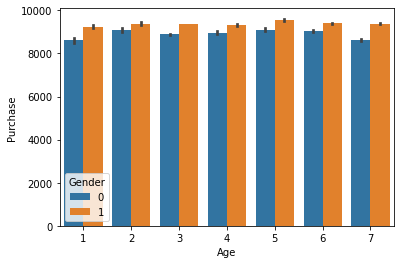

In [65]:
sns.barplot('Age','Purchase', hue = 'Gender' , data=df1)

Purchasing of goods of each range of age are almost equal. We can conclude that the percentage of purchasing goods of men over women is higher.

### Visualizing Occupation Vs Purchased.

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

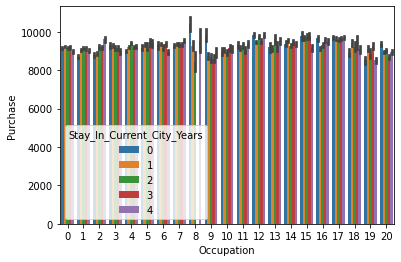

In [66]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df1)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city

### Visualizing Product_category1 Vs Purchased.

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cat1', ylabel='Purchase'>

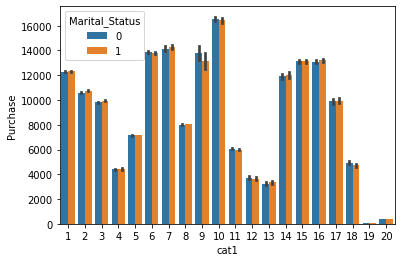

In [67]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df1)

### Visualizing Product_category2 Vs Purchased

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

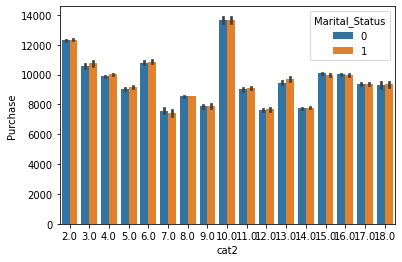

In [68]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df1)

### Visualizing Product_category3 Vs Purchased

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

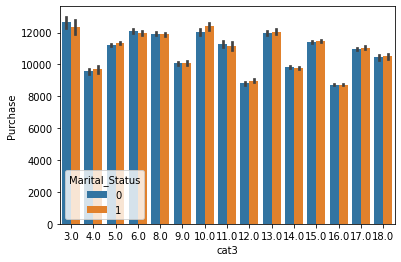

In [69]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df1)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not. product category3 is much more purchased by people than product category2 and product category1